# Proyecto Integrado Módulo 1:

## Introducción:

A lo largo de este proyecto, se analizará una base de datos en la que se reunen datos de diferentes videojuegos para distintas plataformas con sus años de lanzamiento, género, ventas por región y la calificación de usuarios y críticos profesionales.

El objetivo del trabajo será conocer el comportamiento de las ventas de los juegos y plataformas de modo que, entre otras acciones, podamos planificar campañas de ventas para futuros videojuegos.

### Carga de librerías y datos:

In [1]:
# Cargamos las librerías que se utilizarán en el proyecto.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [3]:
# Cargamos la base de datos:
path = 'C:/Users/jmrey/OneDrive/Jose Ma/Casos Análisis de Datos/2025_Consolas/'
file = 'games.csv'

df_games = pd.read_csv(path + file)

# Presentamos el dataframe:
df_games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16483,Petz: Hamsterz Life 2,GBA,2007.0,Misc,0.01,0.00,0.00,0.00,NaN,NaN,NaN
3953,Paws & Claws: Dogs & Cats Best Friends,DS,2007.0,Simulation,0.46,0.01,0.00,0.04,NaN,NaN,NaN
12499,Call of Cthulhu: Dark Corners of the Earth,XB,2005.0,Adventure,0.05,0.01,0.00,0.00,77.0,8.1,M
9997,Deception IV: Blood Ties,PS3,2014.0,Action,0.03,0.02,0.06,0.01,70.0,8.2,M
710,Onimusha 2: Samurai's Destiny,PS2,2002.0,Adventure,0.62,0.44,1.06,0.13,84.0,9,M


## Preparación de los datos:

En esta segunda sección verificaremos la estructura del DataFrame que hemos creado con la base de datos de videojuegos importada. Así mismo, realizaremos los cambios que se consideren pertinentes para trabajar de forma más sencilla, clara y ordenada en los siguientes pasos del proyecto.

In [4]:
# Vemos el tipo de dato, nombre de las columnas y cantidad de datos faltantes de cada columna:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Revisamos el número de registros duplicados:
print(f"En el DataFrame se cuentan con {df_games.duplicated().sum()} registros duplicados.")

En el DataFrame se cuentan con 0 registros duplicados.


Algunas observaciones iniciales que podrán ser relevantes:
1) El nombre de las columnas convendrá convertirlo al llamado "snake_case", poniendo todo a minúsculas.
2) El año de lanzamiento será mejor manejarlo como un número entero.
3) La calificación de usuarios deberemos cambiarla a un tipo de dato flotante y convendrá multiplicarla por 10 para dejarla en la misma escala la calificación de la crítica.
4) Para cada columna indagaremos sobre el porqué se tienen los datos ausentes y como conviene manejarlos.

Al momento de revisar cada una de las columnas se analizarán los valores duplicados que puedan existir y como manejarlos.

In [7]:
# Convertiremos las columnas al "snake_case":
columnas = df_games.columns

columnas_nuevas = [columna.lower().replace(' ', '_') for columna in columnas]

df_games.columns = columnas_nuevas

print("Las nuevas columnas son: \n", df_games.columns)

Las nuevas columnas son: 
 Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [9]:
# Cambiaremos el tipo de dato ara la columna "year" a "int64":
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

print("Nuevo tipo de dato para la columna 'year_of_release': ", df_games['year_of_release'].dtype)

Nuevo tipo de dato para la columna 'year_of_release':  Int64


In [12]:
# Modificaremos la columna de "user_score" para que sea de tipo "float64" y que esté en la misma escala que
# la columna "critic_score":

# Al intentar realizar el cambio de tipo de dato para la columna "user_score" se generó un error
# "ValueError: could not convert string to float: 'tbd'". Por esto, se procede a cambiar los valores
# "tbd" por "NaN" y posteriormente cambiar el tipo de dato de la columna:

df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].astype('float64')
df_games['user_score'] = df_games['user_score'] * 10

print("Nuevo tipo de dato para la columna 'user_score': ", df_games['user_score'].dtype)

Nuevo tipo de dato para la columna 'user_score':  float64


A continuación, exploraremos columna por columna para validar duplicados y datos ausentes y trabajarlos según corresponda.

In [13]:
# Iniciamos con la columna "name":
print("Cantidad de valores únicos en la columna 'name': ", df_games['name'].nunique())
print("Cantidad de valores faltantes en la columna 'name': ", df_games['name'].isnull().sum())

Cantidad de valores únicos en la columna 'name':  11559
Cantidad de valores faltantes en la columna 'name':  2


En esta columna estamos analizando los nombres de los videojuegos, por lo mismo, es de esperarse que haya registros repetidos, pues un mismo videojuego podrá estar en varias plataformas.

Así mismo, sustituiremos los valores faltantes por "no definido".

Por último, convertiremos los nombres al "snake_case" para evitar duplicados no explícitos.

In [14]:
# Convertimos al "snake_case" los nombres de los juegos:
df_games['name'] = df_games['name'].replace(" ","_").str.lower()

# Asignamos "no_definido" a los valores faltantes en la columna "name":
df_games['name'] = df_games['name'].fillna('no_definido')

# Validamos:
print("Cantidad de valores únicos en la columna 'name': ", df_games['name'].nunique())
print("Cantidad de valores faltantes en la columna 'name': ", df_games['name'].isnull().sum())

Cantidad de valores únicos en la columna 'name':  11560
Cantidad de valores faltantes en la columna 'name':  0


In [15]:
# Continuamos con la columna "platform":
print("Cantidad de valores únicos en la columna 'platform': ", df_games['platform'].nunique())
print("Cantidad de valores faltantes en la columna 'platform': ", df_games['platform'].isnull().sum())

Cantidad de valores únicos en la columna 'platform':  31
Cantidad de valores faltantes en la columna 'platform':  0


In [16]:
# Puesto que son pocos los nombres de las consolas, los podemos validar manualmente:
print("Valores únicos en la columna 'platform': ", df_games['platform'].unique())

Valores únicos en la columna 'platform':  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


No se aprecia nada que valga la pena modificar para la columna de plataformas. Si bien, pudieran convertirse los nombres de las plataformas todo a minúsculas o todo a mayúsculas, en el contexto de sus nombres tiene sentido mantenerse como está.

In [17]:
# La siguiente es la columna "year_of_release":
print("Cantidad de valores faltantes en la columna 'year_of_release': ", df_games['year_of_release'].isnull().sum())
print(f"El primer año de registro es: {df_games['year_of_release'].min()}, el último es: {df_games['year_of_release'].max()}")

Cantidad de valores faltantes en la columna 'year_of_release':  269
El primer año de registro es: 1980, el último es: 2016


No tendría sentido reemplazar los valores ausentes con la media o la mediana del total de la información, por esto, la ruta que se seguirá será:
1) Validar si el título con año de lanzamiento faltante se ha lanzado para otra plataforma. Si sí, se usará ese mismo año para reemplazar.
2) Validar la consola del videojuego y reeplazar con la mediana de los años en que esta consola estuvo vigente el año de lanzamiento del juego.

In [31]:
# Utilizaremos un for-loop para implementar la ruta previamente establecida:
for i, row in df_games[df_games['year_of_release'].isnull() == True].iterrows():
    plataforma = row['platform']
    nombre = row['name']

    # Validamos si hay registro del año de lanzamiento para otras plataformas:
    año_lanzamiento = df_games[df_games['name']==nombre]['year_of_release'].mode()
    # Si los videojuegos de otras plataformas tampoco tienen año de lanzamiento registrado:
    if año_lanzamiento.empty == False:
        df_games.loc[i,'year_of_release'] = año_lanzamiento[0]
    # Si no se tiene año de lanzamiento para otras plataformas, se asignará la mediana de la plataforma:
    else:
        año_plataforma = df_games[df_games['platform']==plataforma]['year_of_release'].median()
        df_games.loc[i,'year_of_release'] = año_plataforma

# Validamos:
print("Cantidad de valores faltantes en la columna 'year_of_release': ", df_games['year_of_release'].isnull().sum())

Cantidad de valores faltantes en la columna 'year_of_release':  0


In [32]:
# Seguimos trabajando con la columna "genre":
print("Cantidad de valores únicos en la columna 'genre': ", df_games['genre'].nunique())
print("Cantidad de valores faltantes en la columna 'genre': ", df_games['genre'].isnull().sum())

Cantidad de valores únicos en la columna 'genre':  12
Cantidad de valores faltantes en la columna 'genre':  2


In [33]:
# Vemos que son pocos valores únicos, por lo que analizamos manualmente:
print("Valores únicos en la columna 'genre': ", df_games['genre'].unique())

# Así mismo, podemos reemplazar los valores faltantes por "no_definido":
df_games['genre'] = df_games['genre'].fillna('no_definido')
print("Cantidad de valores faltantes en la columna 'genre': ", df_games['genre'].isnull().sum())

Valores únicos en la columna 'genre':  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Cantidad de valores faltantes en la columna 'genre':  0


Semejante a lo visto con las consolas, contamos con registros en que están en mayúsculas y minúsculas, por orden pasaremos todo a minúsculas a pesar de que no nos causaría afectaciones no hacerlo.

In [34]:
# Pasamos a minúsculas todos los valores de la columna "genre":
df_games['genre'] = df_games['genre'].str.lower()
print("Valores únicos en la columna 'genre': ", df_games['genre'].unique())

Valores únicos en la columna 'genre':  ['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy' 'no_definido']


Sabemos que las columnas NA_sales, EU_sales, JP_sales y Other_sales son numéricas y no cuentan con valores ausentes así que las saltamos.

In [37]:
# Continuamos con la columna "critic_score":
print("Cantidad de valores faltantes en la columna 'critic_score': ", df_games['critic_score'].isnull().sum())

Cantidad de valores faltantes en la columna 'critic_score':  8578


Al tratarse de la calificación que asignan críticos profesionales a un videojuego en su presentación de plataforma, no conviene reemplazar con un valor fijo los valores ausentes, en cambio, interpretamos que dicho juego no tuvo el alcance o las condiciones para ser calificado, por esto, dejaremos los ausentes como NaN y posteriormente adaptaremos esta condición a nuestro análisis.

In [38]:
# Lo mismo con la columna "user_score":
print("Cantidad de valores faltantes en la columna 'user_score': ", df_games['user_score'].isnull().sum())

Cantidad de valores faltantes en la columna 'user_score':  9125


Manejaremos esta columna de forma semejante a la de la calificación de la crítica, no conviene reemplazar con un valor fijo los valores ausentes, en cambio, interpretamos que dicho juego no tuvo el alcance o las condiciones para ser calificado, por esto, dejaremos los ausentes como NaN y posteriormente adaptaremos esta condición a nuestro análisis.

In [39]:
# Por último, la columna "rating":
print("Cantidad de valores únicos en la columna 'rating': ", df_games['rating'].nunique())
print("Cantidad de valores faltantes en la columna 'rating': ", df_games['rating'].isnull().sum())

Cantidad de valores únicos en la columna 'rating':  8
Cantidad de valores faltantes en la columna 'rating':  6766


In [40]:
# Vemos que son pocos valores únicos, por lo que analizamos manualmente:
print("Valores únicos en la columna 'rating': ", df_games['rating'].unique())

Valores únicos en la columna 'rating':  ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [41]:
# Reemplazamos los valores ausentes por "sin_clasificar":
df_games['rating'] = df_games['rating'].fillna('sin_clasificar')

# Validamos:
print("Cantidad de valores faltantes en la columna 'rating': ", df_games['rating'].isnull().sum())

Cantidad de valores faltantes en la columna 'rating':  0


## Revisión inicial de los datos:

Ya con nuestra información homogeneizada y ajustada a lo que consideramos necesario, obtendremos algo de información preliminar estadística que nos de un poco más de rumbo camino al análisis del trabajo.

In [43]:
# El método describe siempre es un buen punto de partida:
df_games.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
year_of_release,16715.0,2006.469758,5.896963,1980.0,2003.0,2007.0,2010.0,2016.0
na_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
user_score,7590.0,71.250461,15.000061,0.0,64.0,75.0,82.0,97.0


In [44]:
# Así mismo, conocer las ventas totales será un buen indicador:
df_games['global_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print("Ventas totales en NA: ", df_games['na_sales'].sum())
print("Ventas totales en EU: ", df_games['eu_sales'].sum())
print("Ventas totales en JP: ", df_games['jp_sales'].sum())
print("Ventas totales en otras regiones: ", df_games['other_sales'].sum())
print("Ventas totales globales: ", df_games['global_sales'].sum())

Ventas totales en NA:  4402.35
Ventas totales en EU:  2424.67
Ventas totales en JP:  1297.37
Ventas totales en otras regiones:  791.32
Ventas totales globales:  8915.71


## Análisis de los datos:

Por establecer un orden en el cuál se realizará el análisis, se decide dividirlo en tres partes:
1) Año de lanzamiento.
2) Plataformas.
3) Género.

El objetivo de este análisis será plantear las bases que nos permitan construir un modelo para predecir el comportamiento de ventas en 2017 (el año inmediatamente posterior al último año registrado en nuestra base de datos).

Se trabajará gráficamente para agilizar el análisis:

### Año de lanzamiento:

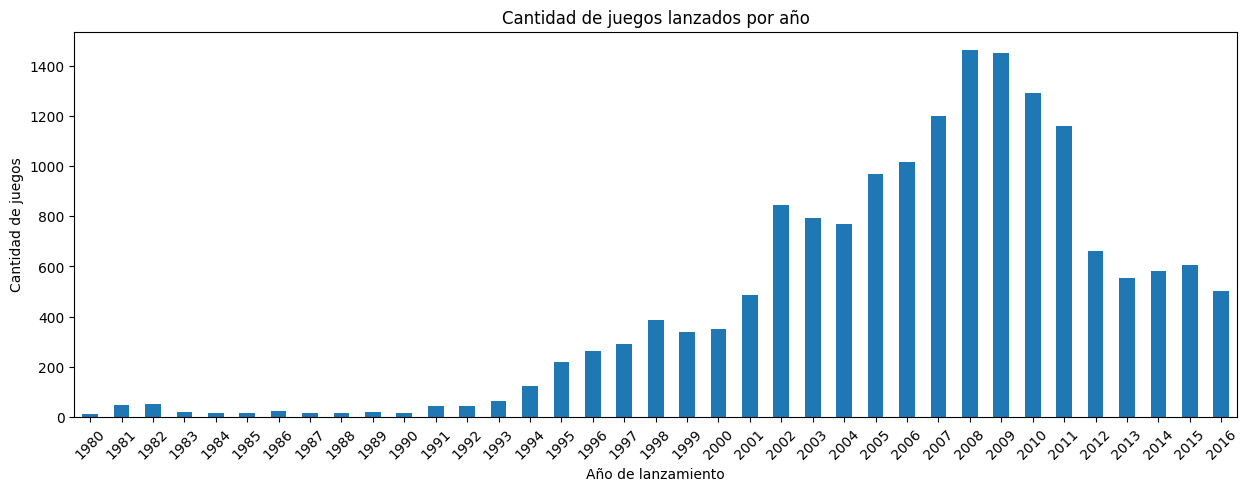

In [46]:
# Veamos cuantos juegos salieron por año con un gráfico de barras:
df_games['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(15,5),
                                                             title='Cantidad de juegos lanzados por año',
                                                             xlabel='Año de lanzamiento', ylabel='Cantidad de juegos',
                                                             rot=45)

plt.show()

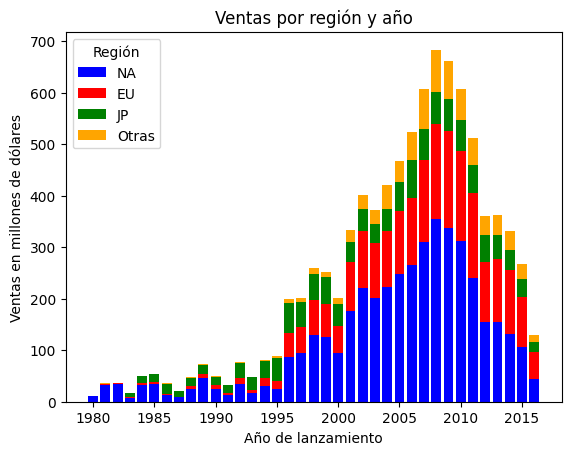

In [52]:
# Veamos ahora cuanto se vendió por año y por región mediante otro gráfico de barras apiladas:
# Para crear el gráfico apilado, recorreremos las columnas de ventas por región y las sumaremos:
años = df_games['year_of_release'].unique()

for año in años:
    ventas_na = df_games[df_games['year_of_release']==año]['na_sales'].sum()
    ventas_eu = df_games[df_games['year_of_release']==año]['eu_sales'].sum()
    ventas_jp = df_games[df_games['year_of_release']==año]['jp_sales'].sum()
    ventras_otras = df_games[df_games['year_of_release']==año]['other_sales'].sum()

    # Graficamos la barra para el año correspondiente:
    plt.bar(año, ventas_na, label='NA', color='blue')
    plt.bar(año, ventas_eu, label='EU', color='red',
            bottom=ventas_na)
    plt.bar(año, ventas_jp, label='JP', color='green',
            bottom=ventas_na + ventas_eu)
    plt.bar(año, ventras_otras, label='Otras', color='orange',
            bottom=ventas_na + ventas_eu + ventas_jp)

plt.title('Ventas por región y año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas en millones de dólares')

plt.legend(['NA', 'EU', 'JP', 'Otras'], title='Región', loc='upper left')
plt.show()

#### Observaciones:

Podemos ver que a partir de 209, la tendencia es que han disminuido los lanzamientos de videojuegos nuevos y esto ha venido acompañado por una caída en las ventas globales.

Por otro lado, a partir del año 2000, las ventas por región han sido así 1) NA, 2) EU, 3) Otras y 4) Japón.

Para las siguientes etapas de nuestro análisis, solo se tomarán datos a partir de 2011 por relevancia y para poder dar continuidad a la tendencia a la baja existente.

### Plataformas:

In [53]:
# De acuerdo a lo mencionado en el párrafo anterior, filtraremos el dataframe para quedarnos con los registros
# de los últimos 6 años unicamente:
df_games_filt = df_games[df_games['year_of_release'] >= 2011]

# Validamos:
df_games_filt.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
year_of_release,4065.0,2013.078229,1.774791,2011.0,2011.0,2013.0,2015.0,2016.0
na_sales,4065.0,0.205255,0.567731,0.0,0.0,0.04,0.17,9.66
eu_sales,4065.0,0.165717,0.480545,0.0,0.0,0.03,0.13,9.09
jp_sales,4065.0,0.060681,0.219358,0.0,0.0,0.0,0.05,4.39
other_sales,4065.0,0.05168,0.154587,0.0,0.0,0.01,0.04,3.96
critic_score,1833.0,71.258592,13.058514,13.0,64.0,74.0,81.0,97.0
user_score,2054.0,66.363681,15.391424,2.0,58.0,70.0,78.0,93.0
global_sales,4065.0,0.483333,1.213717,0.01,0.04,0.13,0.4,21.05


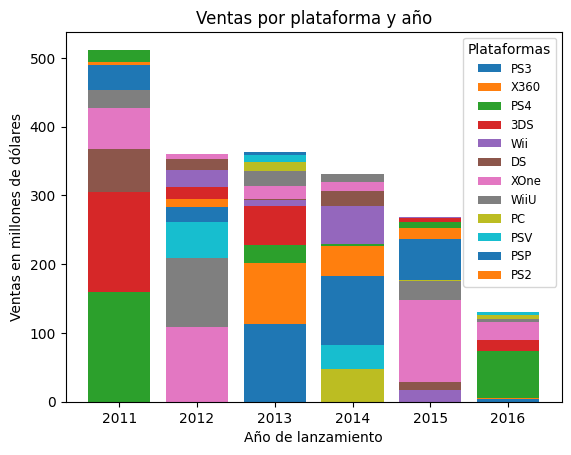

In [65]:
# Haremos un gráfico de barras apiladas para ver las ventas globales anuales por plataforma:
años = df_games_filt['year_of_release'].unique()
plataformas = df_games_filt['platform'].unique()

for año in años:
    y_ini = 0
    for plataforma in plataformas:
        ventas_plat = df_games_filt[(df_games_filt['year_of_release']==año) & (df_games_filt['platform']==plataforma)]['global_sales'].sum()
        # Graficamos la barra para la plataforma en cada año:
        plt.bar(año, ventas_plat, label=plataforma, bottom=y_ini)
        # Establecemos el nuevo inicio para la siguiente barra:
        y_ini += ventas_plat

plt.title('Ventas por plataforma y año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas en millones de dólares')

plt.legend(plataformas, title='Plataformas', loc='best',fontsize='small')
plt.show()

El gráfico no ha quedado tan claro como se esperaba, por lo mismo se recurrirá una presentación de la información numérica.

In [66]:
# Con la siguiente tabla agrupada, presentamos las ventas globales por plataforma y año:
df_games_filt.groupby(['platform','year_of_release'])['global_sales'].sum().unstack().round(2)

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.20,51.76,57.04,43.76,27.78,15.14
DS,26.33,11.67,1.54,NaN,NaN,NaN
PC,35.16,23.45,13.01,13.28,8.52,5.25
PS2,0.45,NaN,NaN,NaN,NaN,NaN
PS3,159.26,108.28,113.25,47.76,16.82,3.60
PS4,NaN,NaN,25.99,100.00,118.90,69.25
PSP,17.82,7.95,3.38,0.24,0.12,NaN
PSV,4.63,16.19,10.59,12.16,6.25,4.25
Wii,59.79,22.94,8.59,3.75,1.14,0.18


Podemos interpretar los valores ausentes de la tabla anterior como que no hubo ventas para dicha plataforma, sin embargo, también es interesante que estos "NaN's" no están repartidos aleatoriamente, sino que parecen marcar el inicio y el fin de la vida de las plataformas.

Buscaremos las plataformas lanzadas solo desde el año 2000 por relevancia.

In [73]:
# En nuestro DataFrame original, obtendremos el primer año en que una plataforma tuvo ventas y lo
# almacenaremos en un diccionario:
primer_año = {}

for plataforma in plataformas:
    año = df_games[df_games['platform']==plataforma]['year_of_release'].min()
    primer_año[plataforma] = año

# Aremos algo similar para obtener el último año en que una plataforma tuvo ventas:
ultimo_año = {}

for plataforma in plataformas:
    año = df_games[df_games['platform']==plataforma]['year_of_release'].max()
    ultimo_año[plataforma] = año

# Ciclando en ambos diccionarios, obtendremos la vida promedio de las plataformas:
vida_total = 0
vida_total_2 = 0
contador = 0
contador_2 = 0

for plataforma in plataformas:
    # No vamos a considerar las plataformas que aún tienen ventas en 2016 puesto que no sabemos si su ciclo
    # de vida ha terminado:
    if ultimo_año[plataforma] == 2016:
        continue
    else:
        if primer_año[plataforma] >= 2000:
            # En caso de que la plataforma fuera lanzada a partir del 2000, sumamos para las variables
            # "global" y "acotada":
            vida_total_2 += (ultimo_año[plataforma] - primer_año[plataforma])
            contador_2 += 1
            vida_total += (ultimo_año[plataforma] - primer_año[plataforma])
            contador += 1
        else:
            vida_total += (ultimo_año[plataforma] - primer_año[plataforma])
            contador += 1

vida_promedio = vida_total / contador
vida_promedio_2 = vida_total_2 / contador_2

print(f"La vida promedio de las plataformas ha sido de {vida_promedio:.2f} años.")
print(f"La vida promedio de las plataformas lanzadas a partir del 2000 ha sido de {vida_promedio_2:.2f} años.")

La vida promedio de las plataformas ha sido de 16.67 años.
La vida promedio de las plataformas lanzadas a partir del 2000 ha sido de 11.00 años.


Contaremos cuantos años lleva cada plataforma que aún registró ventas en 2016:

In [75]:
# Contamos los años que lleva en el mercado cada plataforma que tuvo ventas en 2016:
plataformas_2016 = df_games_filt[df_games_filt['year_of_release']==2016]['platform'].unique()

plataformas_obs = {}

for plataforma in plataformas_2016:
    años_mercado = 2016 - primer_año[plataforma]
    if años_mercado >= 11:
        plataformas_obs[plataforma] = años_mercado
    print(f"La plataforma {plataforma} lleva {años_mercado:.0f} años en el mercado.")

for plataforma in plataformas_obs:
    print(f"La plataforma {plataforma} ha superado la vida promedio de las plataformas en el mercado.")

La plataforma PS4 lleva 3 años en el mercado.
La plataforma 3DS lleva 16 años en el mercado.
La plataforma XOne lleva 3 años en el mercado.
La plataforma WiiU lleva 4 años en el mercado.
La plataforma PS3 lleva 11 años en el mercado.
La plataforma PC lleva 31 años en el mercado.
La plataforma X360 lleva 11 años en el mercado.
La plataforma PSV lleva 5 años en el mercado.
La plataforma Wii lleva 10 años en el mercado.
La plataforma 3DS ha superado la vida promedio de las plataformas en el mercado.
La plataforma PS3 ha superado la vida promedio de las plataformas en el mercado.
La plataforma PC ha superado la vida promedio de las plataformas en el mercado.
La plataforma X360 ha superado la vida promedio de las plataformas en el mercado.


Cerrando aún más el espectro de nuestro estudio para los siguientes pasos, solo se trabajará con las plataformas: PS4, XOne, WiiU, PC (puesto que no es una plataforma en el contexto normal de las demás), PSV y Wii.

In [83]:
# Acotaremos nuestro DataFrame filtrado a las plataformas mencionadas:
plataformas_trabajo = []

for plataforma in plataformas_2016:
    if plataforma not in plataformas_obs.keys() or plataforma == 'PC':
        plataformas_trabajo.append(plataforma)

print(plataformas_trabajo)

['PS4', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii']


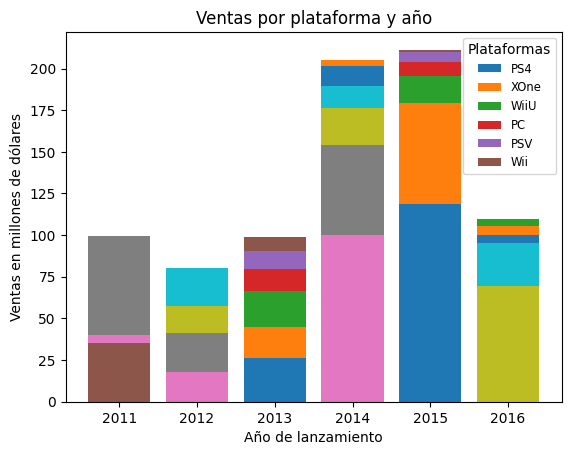

In [85]:
# Veamos como fueron las ventas de estas plataformas en los últimos años:
# Primero, filtramos nuevamente nuestro dataframe:
df_games_filt = df_games_filt[df_games_filt['platform'].isin(plataformas_trabajo)]

# Graficamos las ventas globales por año y plataforma:
años = df_games_filt['year_of_release'].unique()

for año in años:
    y_ini = 0
    for plataforma in plataformas_trabajo:
        ventas_plat = df_games_filt[(df_games_filt['year_of_release']==año) & (df_games_filt['platform']==plataforma)]['global_sales'].sum()
        # Graficamos la barra para la plataforma en cada año:
        plt.bar(año, ventas_plat, label=plataforma, bottom=y_ini)
        # Establecemos el nuevo inicio para la siguiente barra:
        y_ini += ventas_plat

plt.title('Ventas por plataforma y año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas en millones de dólares')

plt.legend(plataformas_trabajo, title='Plataformas', loc='best',fontsize='small')
plt.show()

In [86]:
# También numéricamente:
df_games_filt.groupby(['platform','year_of_release'])['global_sales'].sum().unstack().round(2)

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
PC,35.16,23.45,13.01,13.28,8.52,5.25
PS4,NaN,NaN,25.99,100.00,118.90,69.25
PSV,4.63,16.19,10.59,12.16,6.25,4.25
Wii,59.79,22.94,8.59,3.75,1.14,0.18
WiiU,NaN,17.56,21.65,22.03,16.35,4.60
XOne,NaN,NaN,18.96,54.07,60.14,26.15


Buscaremos datos desde 2013 (que es cuando salieron a la venta PS4 y XOne, las consolas con ventas más altas a 2016) y compararemos como le ha ido a los distintos juegos en cada plataforma. Para esto, haremos un nuevo dataframe en el que las filas serán los juegos y las columnas las plataformas.

In [87]:
# Creamos el nuevo dataframe con juegos lanzados a partir de 2013:
df_juegos_2013 = df_games_filt[df_games_filt['year_of_release'] >= 2013]

df_games_filt_2 = pd.DataFrame(columns=plataformas_trabajo, index=df_juegos_2013['name'])

# Llenamos el dataframe:
for i, row in df_juegos_2013.iterrows():
    df_games_filt_2.loc[row['name'], row['platform']] = row['global_sales']

# Presentamos el nuevo dataframe:
df_games_filt_2.sample(5)

,PS4,XOne,WiiU,PC,PSV,Wii
name,,,,,,
rugby 15,0.12,0.09,NaN,NaN,0.04,NaN
goat simulator,NaN,0.01,NaN,NaN,NaN,NaN
sid meier's civilization vi,NaN,NaN,NaN,0.24,NaN,NaN
lego jurassic world,0.9,0.66,0.52,0.04,0.23,NaN
otoko yukaku,NaN,NaN,NaN,NaN,0.02,NaN


In [88]:
# Reemplazamos los NaN por 0:
df_games_filt_2 = df_games_filt_2.fillna(0)

# Validamos:
df_games_filt_2.sample(5)

,PS4,XOne,WiiU,PC,PSV,Wii
name,,,,,,
dying light,2.09,1.29,0.0,0.20,0.00,0.0
sword art online: lost song,0.25,0.00,0.0,0.00,0.36,0.0
criminal girls 2,0.00,0.00,0.0,0.00,0.06,0.0
call of duty: advanced warfare,7.66,5.26,0.0,0.41,0.00,0.0
amagami,0.00,0.00,0.0,0.00,0.04,0.0


In [89]:
# Contaremos cuantas veces cada plataforma fue la más exitosa en ventas por título y cuántos títulos son
# exclusivos de cada plataforma:
exclusivos = {}
mas_exitosa = {}

for i, row in df_games_filt_2.iterrows():
    # Obtenemos el valor máximo de la fila y la plataforma correspondiente:
    maximo = row.max()
    plataforma = row.idxmax()
    # Si no hemos creado la llave para la plataforma, la creamos y asignamos:
    if plataforma not in mas_exitosa.keys():
        mas_exitosa[plataforma] = 1
    # Si ya existe la llave, sumamos 1:
    else:
        mas_exitosa[plataforma] += 1
    # Calculamos la venta total de el título:
    venta_total = row.sum()
    # Si la venta total es igual a la venta máxima, el título es exclusivo de la plataforma
    if venta_total == row[plataforma]:
        if plataforma not in exclusivos.keys():
            exclusivos[plataforma] = 1
        else:
            exclusivos[plataforma] += 1

# Para fines de comparación, quitaremos los títulos exclusivos de los "más exitosos" para cada plataforma:
for plataforma in exclusivos.keys():
    mas_exitosa[plataforma] -= exclusivos[plataforma]

# Imprimimos:
for plataforma in mas_exitosa:
    print(f"La plataforma {plataforma} ha sido la más exitosa en ventas en {mas_exitosa[plataforma]} títulos.")
    print(f"{exclusivos[plataforma]} son títulos exclusivos de la plataforma.")

La plataforma PS4 ha sido la más exitosa en ventas en 615 títulos.
109 son títulos exclusivos de la plataforma.
La plataforma WiiU ha sido la más exitosa en ventas en 27 títulos.
64 son títulos exclusivos de la plataforma.
La plataforma XOne ha sido la más exitosa en ventas en 18 títulos.
26 son títulos exclusivos de la plataforma.
La plataforma Wii ha sido la más exitosa en ventas en 42 títulos.
3 son títulos exclusivos de la plataforma.
La plataforma PC ha sido la más exitosa en ventas en 18 títulos.
79 son títulos exclusivos de la plataforma.
La plataforma PSV ha sido la más exitosa en ventas en 54 títulos.
273 son títulos exclusivos de la plataforma.


Veamos la información anterior con diagramas de cajas y bigotes.

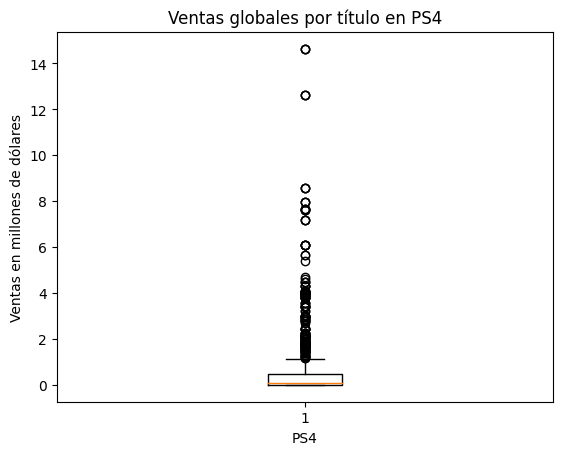

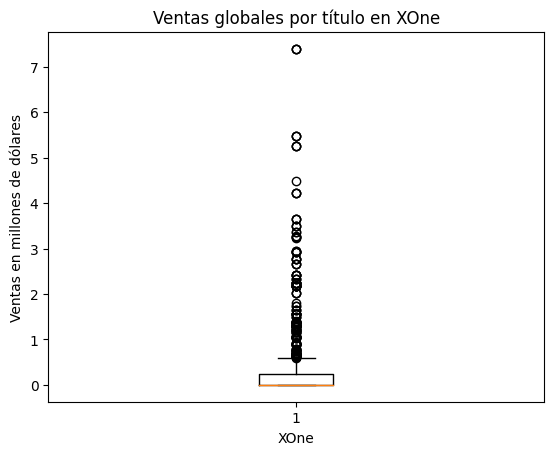

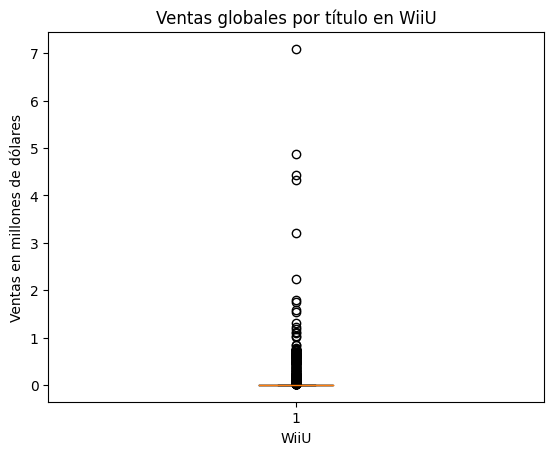

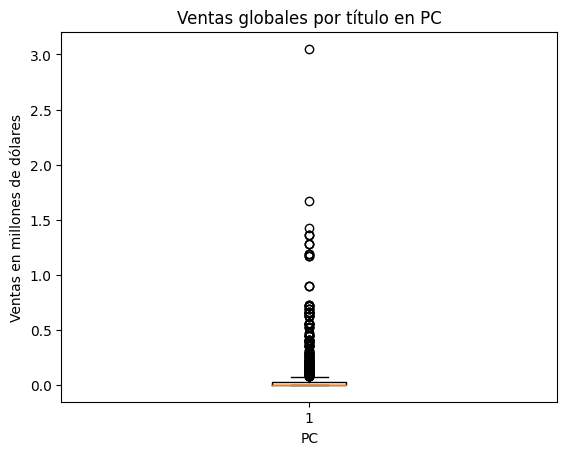

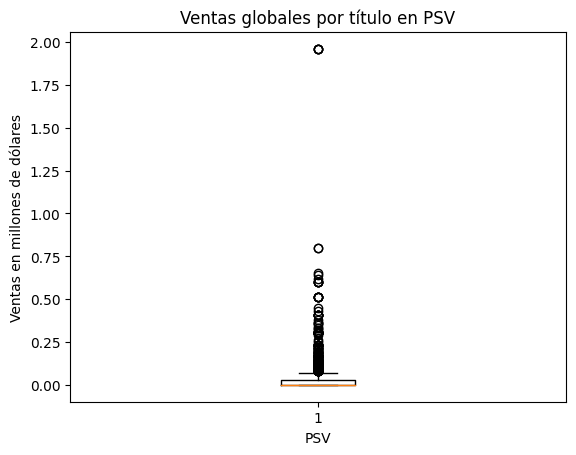

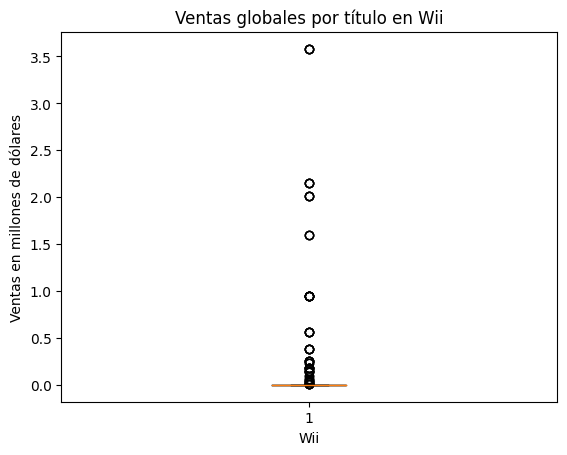

In [93]:
# Creamos "box plots" para cada plataforma:
for plataforma in plataformas_trabajo:
    plt.boxplot(df_games_filt_2[plataforma])
    plt.title(f'Ventas globales por título en {plataforma}')
    plt.xlabel(plataforma)
    plt.ylabel('Ventas en millones de dólares')
    plt.show()

Al analizar los gráficos anteriores, es evidente que cada plataforma ha tenido algunos juegos "nicho" que son tremendamente populares respecto al resto de títulos que se vendieron para dicha plataforma, de ahí que el promedio de ventas y más de la mitad de los títulos vendidos, se visualizan muy por debajo de todos los "outliers" que existen.

Veamos ahora como se comparan las reseñas para la PS4 (plataforma con mejores ventas) y las de la PSV (la que peores ventas ha tenido) y que correlación juegan estas contra las ventas por juegos.

In [ ]:
# Obtenemos un dataframe para las ventas de PS4 y sus reseñas:
df_ps4 = df_games_filt[(df_games_filt['platform']=='PS4') & (df_games_filt['critic_score'].notnull()) & (df_games_filt['user_score'].notnull())]

print("Para la consola PS4, se tienen los siguientes datos:")

# Veamos si existe una correlación entre las reseñas de la crítica y los usuarios:	
corr_score_ps4 = df_ps4[['critic_score','user_score','global_sales']].corr()
print(f"La correlación entre las reseñas de la crítica y los usuarios es de: {corr_score_ps4.iloc[0,1]:.2f}")
# Obtenemos la correlación entre las reseñas de la crítica y las ventas globales:
print(f"La correlación entre las reseñas de la crítica y las ventas globales es de: {corr_score_ps4.iloc[0,2]:.2f}")
# Obtenemos la correlación entre las reseñas de los usuarios y las ventas globales:
print(f"La correlación entre las reseñas de los usuarios y las ventas globales es de: {corr_score_ps4.iloc[1,2]:.2f}")

Para la consola PS4, se tienen los siguientes datos:
              critic_score  user_score  global_sales
critic_score      1.000000    0.557654      0.405895
user_score        0.557654    1.000000     -0.033625
global_sales      0.405895   -0.033625      1.000000
La correlación entre las reseñas de la crítica y los usuarios es de: 0.56
La correlación entre las reseñas de la crítica y las ventas globales es de: 0.56
La correlación entre las reseñas de los usuarios y las ventas globales es de: 0.56


Ningún valor de correlación es suficientemente fuerte para ser relevante.

In [103]:
# Obtenemos un dataframe para las ventas de PSV y sus reseñas:
df_psv = df_games_filt[(df_games_filt['platform']=='PSV') & (df_games_filt['critic_score'].notnull()) & (df_games_filt['user_score'].notnull())]

print("Para la consola PSV, se tienen los siguientes datos:")

# Veamos si existe una correlación entre las reseñas de la crítica y los usuarios:	
corr_score_psv = df_psv[['critic_score','user_score','global_sales']].corr()
print(f"La correlación entre las reseñas de la crítica y los usuarios es de: {corr_score_psv.iloc[0,1]:.2f}")
# Obtenemos la correlación entre las reseñas de la crítica y las ventas globales:
print(f"La correlación entre las reseñas de la crítica y las ventas globales es de: {corr_score_psv.iloc[0,2]:.2f}")
# Obtenemos la correlación entre las reseñas de los usuarios y las ventas globales:
print(f"La correlación entre las reseñas de los usuarios y las ventas globales es de: {corr_score_psv.iloc[1,2]:.2f}")

Para la consola PSV, se tienen los siguientes datos:
La correlación entre las reseñas de la crítica y los usuarios es de: 0.73
La correlación entre las reseñas de la crítica y las ventas globales es de: 0.13
La correlación entre las reseñas de los usuarios y las ventas globales es de: 0.04


En ambos casos hay una aparente correlación entre las puntuaciones de la crítica y los usuarios, sin embargo no llega a ser fuerte (mín. 0.80) y la correlación entre ambas críticas y las ventas es débil o muy débil.

Partiendo de los últimos filtros, plataformas que hemos filtrado y datos a partir de 2013, vamos a analizar como se han comportado las ventas por géneros.

In [132]:
# Construimos el dataframe con todos los filtros antes mencionados:
df_games_filt_final = df_games_filt[df_games_filt['year_of_release'] >= 2013]

# Validamos:
df_games_filt_final.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
year_of_release,1328.0,2014.77259,1.037838,2013.0,2014.0,2015.0,2016.0,2016.0
na_sales,1328.0,0.191242,0.469497,0.0,0.0,0.03,0.15,6.03
eu_sales,1328.0,0.188592,0.502429,0.0,0.0,0.03,0.15,6.31
jp_sales,1328.0,0.034556,0.092223,0.0,0.0,0.0,0.03,1.46
other_sales,1328.0,0.056288,0.154434,0.0,0.0,0.01,0.04,2.38
critic_score,721.0,73.023578,12.077447,19.0,67.0,75.0,81.0,97.0
user_score,784.0,67.149235,15.319065,14.0,60.0,70.0,78.0,93.0
global_sales,1328.0,0.470678,1.086466,0.01,0.03,0.11,0.38,14.63


Analizaremos el comportamiento de las plataformos por región, para eso, compraremos las ventas totales de los títulos por plataforma separando por región.

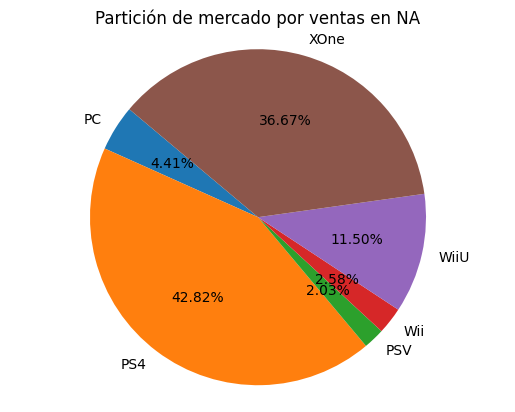

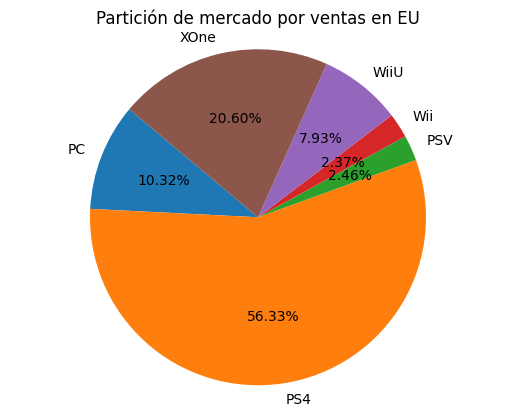

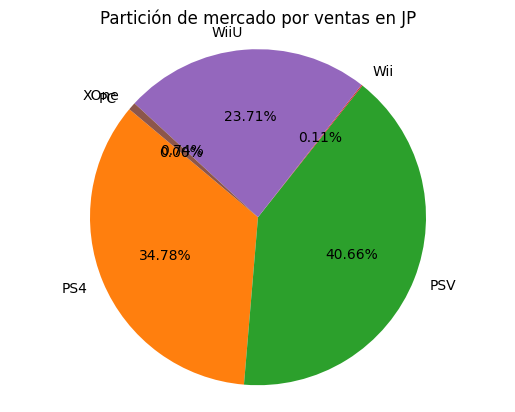

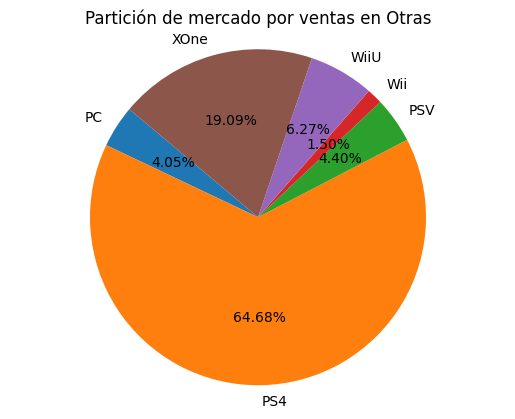

In [133]:
# Para presentar como está la partición del mercado de las plataformas por región, crearemos un gráfico
# de pastel para cada región:
regiones = {'NA':'na_sales', 'EU':'eu_sales', 'JP':'jp_sales', 'Otras':'other_sales'}

for region in regiones:
    ventas = df_games_filt_final.groupby('platform')[regiones[region]].sum()
    plt.pie(ventas, labels=ventas.index, autopct='%1.2f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Partición de mercado por ventas en {region}')
    plt.show()

#### Observaciones:

Redujimos el número de plataformas que conviene estudiar basándonos en el su ciclo de vida, es decir, aquellas que parece que ya lo excedieron han sido retiradas, con esto hemos podido profundizar en el análisis.

Con la información ya (doblemente) acotada/filtrada, podemos observar que todas las plataformas están experimentando una disminución fuerte en las ventas, sin embargo, PS4 y XOne son las que mantienen mayores ventas para 2016.

Por otro lado, juzgando por ritmo de disminución de las ventas, convendrá dar seguimiento a PC, PS4, PSV y XOne debido a que cayeron aproximadamente la mitad o menos, en cambio, la caída para Wii y WiiU fue mucho más fuerte, siendo que Wii practicamente anuncia su salida del mercado en 2017.

Tomando los datos a partir de 2013, que es cuando inician ventas para PS4 y XOne, comparando las plataformas, para videojuegos que han salido en múltiples de ellas, PS4 ha sido, por mucho, la plataforma más exitosa. Así mismo, esta plataforma tiene la mayor cantidad de títulos exclusivos.

Dando más profundidad a nuestro análisis, hemos querido ver en que grado las críticas o puntajes pueden afectar al desempeño de los títulos y plataformas y hemos visto que no existe una aparente correlación entre el éxito en ventas de un título y la calificación que este haya recibido por la crítica o los usuarios.

Por último, salvo por Japón (JP), podemos observar que en todas las regiones se compran más juegos de PS4 y luego de XOne. WiiU y PC están en 3° o 4° dependiendo de la región y Wii y PSV en 5° o 6°.

### Géneros:

Parece que hay géneros con muchas más ventas que otros, pero esto puede ser un poco engañoso, por lo que obtendremos el número de juegos por género, las venta totales y el promedio de ventas por título.

In [130]:
# Obtenemos el número de títulos por género, las ventas totales por género y las ventas promedio por género:
generos = df_games_filt_final['genre'].unique()

num_titulos_gen = {}
ventas_totales_gen = {}
ventas_promedio_gen = {}

for genero in generos:
    titulos = df_games_filt_final[df_games_filt_final['genre']==genero].shape[0]
    ventas = df_games_filt_final[df_games_filt_final['genre']==genero]['global_sales'].sum()
    promedio = ventas / titulos
    num_titulos_gen[genero] = titulos
    ventas_totales_gen[genero] = ventas
    ventas_promedio_gen[genero] = promedio

    print(f"El género {genero} tiene {titulos} títulos, con ventas totales de ${ventas:.2f} MUSD y ventas promedio de ${promedio:.2f} MUSD.")

El género shooter tiene 121 títulos, con ventas totales de $165.65 MUSD y ventas promedio de $1.37 MUSD.
El género action tiene 463 títulos, con ventas totales de $168.59 MUSD y ventas promedio de $0.36 MUSD.
El género sports tiene 122 títulos, con ventas totales de $89.80 MUSD y ventas promedio de $0.74 MUSD.
El género role-playing tiene 167 títulos, con ventas totales de $56.83 MUSD y ventas promedio de $0.34 MUSD.
El género racing tiene 60 títulos, con ventas totales de $30.36 MUSD y ventas promedio de $0.51 MUSD.
El género fighting tiene 41 títulos, con ventas totales de $18.48 MUSD y ventas promedio de $0.45 MUSD.
El género platform tiene 42 títulos, con ventas totales de $27.68 MUSD y ventas promedio de $0.66 MUSD.
El género misc tiene 87 títulos, con ventas totales de $34.62 MUSD y ventas promedio de $0.40 MUSD.
El género simulation tiene 36 títulos, con ventas totales de $10.42 MUSD y ventas promedio de $0.29 MUSD.
El género strategy tiene 39 títulos, con ventas totales de $7.9

Parece que, en promedio, "shooter" es más redituable que cualquier otro género y "action", aunque tiene la mayor cantidad de ventas totales, en promedio no es tan redituable.

In [131]:
# Por facilidad creamos un DF con las ventas promedio por género:
df_top_generos = pd.DataFrame.from_dict(ventas_promedio_gen,orient='index',columns=['ventas_promedio'])

df_top_generos.sort_values(by='ventas_promedio',inplace=True,ascending=False)

df_top_generos = df_top_generos.head(5)

generos_top_5 = df_top_generos.index

print("Los 5 géneros más redituables por el promedio de ventas son:\n", generos_top_5)

Los 5 géneros más redituables por el promedio de ventas son:
 Index(['shooter', 'sports', 'platform', 'racing', 'fighting'], dtype='object')


Algunos géneros podrían ser facilmente ligados a una u otra clasificación de edad (ESRB) debido a las mecánicas y temáticas propias del título, por ejemplo, en un "shooter" sería de esperarse cierto grado de violencia.

Por lo anterior, se analiza la relación entre los géneros y las clasificaciones y como repercute esto en ventas globales y regionales.

In [134]:
# Creamos un dataframe agrupando por género y por rating (ESRB) para presentar las ventas por región y
# globales:
df_ventas_gen_rating = df_games_filt_final.groupby(['genre','rating'])[['na_sales','eu_sales','jp_sales','other_sales','global_sales']].sum()

df_ventas_gen_rating

na_sales  eu_sales  jp_sales  other_sales  \
genre        rating                                                      
action       E                   0.90      0.92      0.08         0.23   
             E10+                9.81      9.61      0.32         2.64   
             M                  36.60     39.72      3.27        11.70   
             T                   7.66      7.40      2.69         2.60   
             sin_clasificar     11.42     10.93      6.42         3.67   
adventure    E                   0.14      0.34      0.00         0.14   
             E10+                0.14      0.35      0.00         0.07   
             M                   1.80      2.31      0.30         0.66   
             T                   0.21      0.28      0.01         0.07   
             sin_clasificar      1.66      2.14      2.11         0.60   
fighting     E10+                0.50      0.26      0.17         0.08   
             M                   2.54      1.05      0.02         0.62   
             T                   2.03      2.09      0.95         0.73   
             sin_clasificar      3.64      1.78      1.27         0.75   
misc         E                   1.62      1.44      1.18         0.25   
             E10+                6.15      4.44      0.00         1.11   
             M                   0.72      0.46      0.18         0.19   
             T                   1.77      0.84      0.43         0.41   
             sin_clasificar      4.65      4.59      2.72         1.47   
platform     E                   7.03      5.07      2.25         1.37   
             E10+                4.24      3.91      0.59         1.07   
             T                   0.21      0.28      0.03         0.06   
             sin_clasificar      0.50      0.76      0.07         0.24   
puzzle       E                   0.53      0.38      0.20         0.09   
             E10+                0.09      0.03      0.00         0.01   
             sin_clasificar      0.00      0.00      0.07         0.00   
racing       E                   6.67      8.58      1.42         1.75   
             E10+                1.98      2.41      0.05         0.59   
             T                   0.60      1.57      0.03         0.32   
             sin_clasificar      1.04      2.62      0.18         0.55   
role-playing E                   0.20      0.14      0.05         0.03   
             E10+                0.12      0.25      0.22         0.08   
             M                  12.47     13.50      1.51         3.90   
             T                   2.17      1.79      3.78         0.81   
             sin_clasificar      4.65      4.03      5.58         1.55   
shooter      E10+                2.84      2.28      1.54         0.57   
             M                  42.08     37.61      1.80        11.58   
             T                  12.99      9.66      0.59         3.52   
             sin_clasificar     17.46     15.28      0.63         5.22   
simulation   E                   0.33      1.67      0.00         0.18   
             E10+                0.48      0.77      0.00         0.17   
             T                   1.15      2.44      0.06         0.31   
             sin_clasificar      0.47      2.02      0.16         0.21   
sports       E                  26.67     32.94      1.14         9.32   
             E10+                6.69      1.79      0.09         1.41   
             T                   3.19      3.34      0.01         1.04   
             sin_clasificar      0.45      0.60      1.00         0.12   
strategy     E                   0.44      0.28      0.00         0.11   
             E10+                0.66      0.89      0.29         0.14   
             M                   0.06      0.25      0.00         0.04   
             T                   1.41      2.05      0.02         0.38   
             sin_clasificar      0.14      0.31      0.41         0.02   

                             glo

En términos generales, los juegos para adultos (M = Mature) suelen desempeñarse mejor sin importar la región y el género.

Probaremos lo revisado en esta sección tomando el top 5 de títulos más vendidos a nivel global.

In [140]:
# Mostramos el top 5 de títulos más vendidos a nivel global con sus ventas, clasificación, género y consola:
df_games_filt_final.sort_values(by='global_sales',ascending=False).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,sin_clasificar,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,sin_clasificar,7.98
92,call of duty: advanced warfare,PS4,2014,shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66


## Experimentación estadística:

Para finalizar el análisis, realizaremos unas cuantas pruebas de hipótesis de modo que podamos obtener información adicional para elaborar las conclusiones de este trabajo.

### Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [137]:
# Para probar esta hipótesis crearemos dos Series, una con todas las calificaciones (no nulas) de XOne y
# otra con todas las calificaciones (no nulas) de PC:
s_xone_us = df_games_filt_final[(df_games_filt_final['platform']=='XOne')
                             & (df_games_filt_final['user_score'].isna() == False)]['user_score']

s_pc_us = df_games_filt_final[(df_games_filt_final['platform']=='PC')
                             & (df_games_filt_final['user_score'].isna() == False)]['user_score']

# Nuestras series son tomadas del dataframe filtrado para manter la información relevante.

# Estalecemos un rango de confianza del 95%:
alpha = 0.05

# Realizamos la prueba de hipótesis:
prueba_h1 = st.ttest_ind(s_xone_us, s_pc_us, equal_var=False)
p_h1 = prueba_h1.pvalue

print(f"El valor p de la prueba de hipótesis es de: {p_h1:.2f}")

if p_h1 < alpha:
    print(f"Se rechaza la hipótesis nula, por lo que las calificaciones medias de los usuarios de XOne y PC son diferentes.")
else:
    print(f"No se rechaza la hipótesis nula, por lo que las calificaciones medias de los usuarios de XOne y PC son iguales.")

El valor p de la prueba de hipótesis es de: 0.16
No se rechaza la hipótesis nula, por lo que las calificaciones medias de los usuarios de XOne y PC son iguales.


### Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [138]:
# Seguimos un procedimiento semejante, creando dos series de datos para las calificaciones de los usuarios
# de los géneros Acción y Deportes:
s_accion_us = df_games_filt_final[(df_games_filt_final['genre']=='action')
                                  & (df_games_filt_final['user_score'].isna() == False)]['user_score']
s_deportes_us = df_games_filt_final[(df_games_filt_final['genre']=='sports')
                                  & (df_games_filt_final['user_score'].isna() == False)]['user_score']

# Nuestras series son tomadas del dataframe filtrado para manter la información relevante.

# Estalecemos un rango de confianza del 95%:
alpha = 0.05

# Realizamos la prueba de hipótesis:
prueba_h2 = st.ttest_ind(s_accion_us, s_deportes_us, equal_var=False)
p_h2 = prueba_h2.pvalue

print(f"El valor p de la prueba de hipótesis es de: {p_h2:.2f}")

if p_h2 < alpha:
    print(f"Se rechaza la hipótesis nula, por lo que las calificaciones medias de los usuarios para juegos de Acción y deportes son diferentes.")
else:
    print(f"No se rechaza la hipótesis nula, por lo que las calificaciones medias de los usuarios para juegos de Acción y deportes son iguales.")

El valor p de la prueba de hipótesis es de: 0.00
Se rechaza la hipótesis nula, por lo que las calificaciones medias de los usuarios para juegos de Acción y deportes son diferentes.


### Observaciones:

Las hipótesis anteriores nos ayudan a confirmar o desmentir si el comportamiento para dos condiciones distintas es igual o diferente. En este caso, las condiciones han sido las consolas XBOX One y PC y, por otro lado, los géneros de Acción y Deportes.

Las condiciones se han escogido aleatoriamente para fines demostrativos, pero el planteamiento de las hipótesis ha respondido a la forma en que suelen presentar hipótesis estadísticas nulas, es decir, suponiendo que el cambio o diferencia entre un par de condiciones para una misma variable es *Nulo*, o sea que no tiene significancia estadística.

Utilizamos la prueba T de la librería Scipy ya que es una prueba común y popular para encontrar significancia estadística, en este caso, el valor de significancia "p" que nos indica que tan extrema es la distribución de un conjunto de datos respecto de una distribución normal. Esto lo hemos comparado con un valor alpha de 5% con el que indicamos que esperamos que, por lo menos el 95% de los datos de cada muestra compartan una distribución semejante entre sí.

Cuando nuestro valor de p es mayor que el valor de alpha, consideramos que no hay diferencias estadísticas significativas y, por ende, no podemos rechazar la hipótesis nula.

## Conclusiones:

Se ha analizado un conjunto de información que contiene datos referentes a la venta de distintos videojuegos para distintas plataformas, regiones geográficas y años.

A través de la lectura y familiarización con los datos, se ha podido establecer un subconjunto de información que guarda mayor relevancia para un análisis en el que busquemos construir un modelo de datos que guíe nuestras decisiones con vista a establecer estrategias para vender videojuegos en 2017 (el año inmediatamente posterior al último año de ventas registrado en nuestra base de datos). Este subconjunto contiene únicamente las plataformas que aún tienen tiempo dentro de su ciclo de vida, es decir, que llevan menos de 11 años en el mercado, pero que además considera únicamente ventas a partir de que salieron a la venta títulos para las plataformas más exitosas vigentes: la Play Station 4 (Sony) y el XBOX One (Microsoft).

Analizamos y comparamos múltiples variables que nos han permitido conocer un poco más sobre los mercados regionales, sin embargo, salvo por una diferencia significativa en la preferencia de plataformas en Japón, podemos ver que el mercado de los videojuegos es más o menos homogéneo en todo el mundo, considerando estos datos:
1) Las plataformas "fijas" captan más ventas que las móviles, siendo PS4 y XOne las más populares del momento.
2) La caída en ventas que se ha experimentado desde 2009 es generalizada en todos los aspectos y regiones. *Quizá una pandemia obligue a la gente a permanecer en casa y buscar entretenimiento en los videojuegos de modo que se logre el mayor pico de ventas histórico, pero eso es un quizá muy difícil...*
3) Los juegos con clasificación para adultos (M) suelen generar más ingresos.
4) Identificamos los géneros cuyos títulos, en promedio, generan más ganancias, lo cual pudimos confirmar al revisar los 5 títulos que más ventas consiguieron en nuestro subconjunto de información y ver que 3 son shooter, 2 son de clasificación M y otros 2 sin clasificación pero con altas probabilidad de ser clasificados M intuyéndose por el título.
5) A pesar de todo lo que se pudiera especular, con los datos con los que contamos, no tenemos suficiente información para poder establecer una correlación entre las clasificaciones de los usuarios o de la crítica y el desempeño en ventas de los títulos y plataformas.

Viendo hacia el futuro de un análisis con el cual planear el lanzamiento de un videojuego nuevo para 2017, podríamos concluir que contamos con suficientes herramientas para hacer un primer planteamiento y que este sería: un juego *shooter*, de clasificación *M*, lanzado a las consolas *PS4, XOne, WiiU y PC*.

(Wii ya estaría en su año 11 de ventas en 2017 y quizá no convenga incluirlo, PSV realmente no tuvo tantas ventas salvo en Japón, se pueden ahorrar costos de desarrollo al no lanzar el juego en esta plataforma móvil.)